In [1]:
from datasets import load_dataset
import pandas as pd
ds  = load_dataset("cornell-movie-review-data/rotten_tomatoes")
df = pd.DataFrame(ds["train"])

In [3]:
df

,text,label,text_clean
0,the rock is destined to be the 21st century's ...,1,the rock is destined to be the 21st century's ...
1,"the gorgeously elaborate continuation of "" the...",1,"the gorgeously elaborate continuation of "" the..."
2,effective but too-tepid biopic,1,effective but too-tepid biopic
3,if you sometimes like to go to the movies to h...,1,if you sometimes like to go to the movies to h...
4,"emerges as something rare , an issue movie tha...",1,"emerges as something rare , an issue movie tha..."
...,...,...,...
8525,any enjoyment will be hinge from a personal th...,0,any enjoyment will be hinge from a personal th...
8526,if legendary shlockmeister ed wood had ever ma...,0,if legendary shlockmeister ed wood had ever ma...
8527,hardly a nuanced portrait of a young woman's b...,0,hardly a nuanced portrait of a young woman's b...
8528,"interminably bleak , to say nothing of boring .",0,"interminably bleak , to say nothing of boring ."


In [2]:
import re
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["text_clean"] = df["text"].apply(clean_text)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text_clean"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=3000, stop_words="english")
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_bow.toarray())
X_test_norm = scaler.transform(X_test_bow.toarray())

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5662368112543963


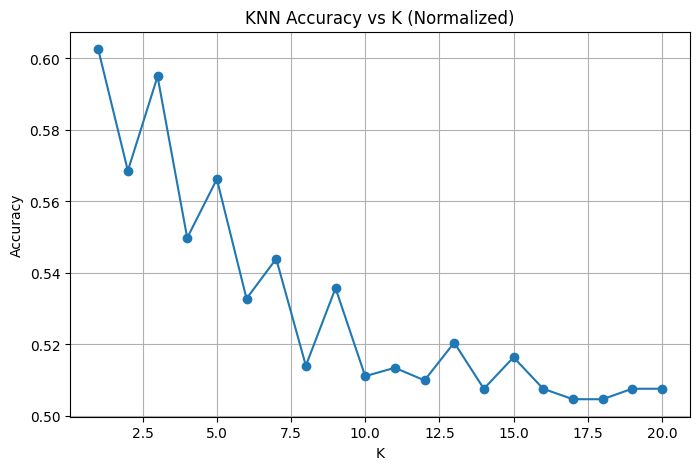

In [8]:
import matplotlib.pyplot as plt

k_values = list(range(1, 21))
accuracies_norm = []
for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn_k.fit(X_train_norm, y_train)
    y_pred_k = knn_k.predict(X_test_norm)
    accuracies_norm.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies_norm, marker='o')
plt.title("KNN Accuracy vs K (Normalized)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

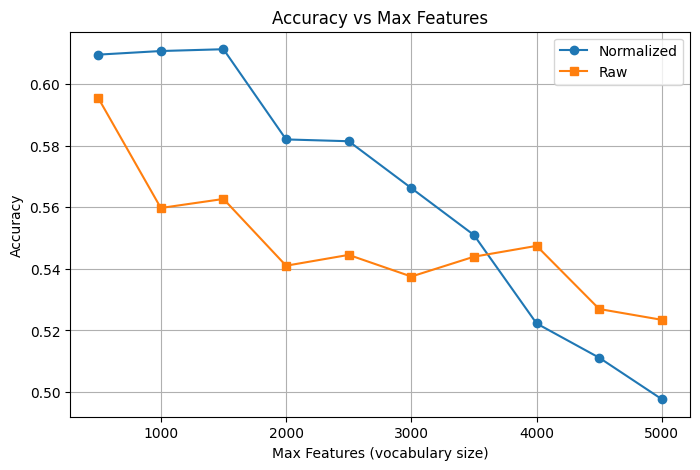

In [9]:
max_features_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
accuracies_norm_by_mf = []
accuracies_raw_by_mf = []
for mf in max_features_list:
    bow_mf = CountVectorizer(max_features=mf, stop_words="english")
    X_train_bow_mf = bow_mf.fit_transform(X_train)
    X_test_bow_mf = bow_mf.transform(X_test)

    # raw arrays
    X_train_raw_mf = X_train_bow_mf.toarray()
    X_test_raw_mf = X_test_bow_mf.toarray()

    # normalized
    scaler = MinMaxScaler()
    X_train_norm_mf = scaler.fit_transform(X_train_raw_mf)
    X_test_norm_mf = scaler.transform(X_test_raw_mf)

    # KNN (normalized)
    knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
    knn.fit(X_train_norm_mf, y_train)
    y_pred_norm = knn.predict(X_test_norm_mf)
    accuracies_norm_by_mf.append(accuracy_score(y_test, y_pred_norm))

    # KNN (raw)
    knn.fit(X_train_raw_mf, y_train)
    y_pred_raw = knn.predict(X_test_raw_mf)
    accuracies_raw_by_mf.append(accuracy_score(y_test, y_pred_raw))
    plt.figure(figsize=(8,5))
plt.plot(max_features_list, accuracies_norm_by_mf, marker='o', label='Normalized')
plt.plot(max_features_list, accuracies_raw_by_mf, marker='s', label='Raw')
plt.title("Accuracy vs Max Features")
plt.xlabel("Max Features (vocabulary size)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()